<a href="https://colab.research.google.com/github/ricardoemf03/applied-physics/blob/main/computational-physics/euler-method-with-a-projectile/(EN)_Euler_methon_of_a_projectile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Modeling of Projectile Motion with and without Air Resistance: Implementation and Numerical Analysis using Python and the Euler Method**
#### **Ricardo José Manuel Escobar Matzir**
#### **computational physics**

We define the initial values

$k = \frac{B_2}{m}= 0.00004 \text{ s}^{-1}$ \
$g = 9.8 \frac{\text{m}}{\text{s}^2}$ \
$v_0 = 700 \frac{\text{m}}{\text{s}}$ \
$\theta = \frac{\pi}{6}$ \
N = $10^5$ \
$dt = 0.01$



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#We define the initial values
k = 0.00004 # k = B2/m
g = 9.8 # value of the acceleration of gravity
v0 = 700 # magnitude of initial velocity
theta = np.pi/6 # launch angle
N = 1e5 # number of values ​​to calculate
dt = 0.01 #

###**1. Solve differential equations**
 Here we define a function $\texttt{projectile(resistance, angle, initial speed)}$ that takes the air resistance, launch angle, and initial speed of the projectile as parameters.

Inside the function, we use a $\texttt{while}$ loop that applies the Euler method to the differential equations as long as the height remains positive ($y>0$). This ensures that, assuming the projectile is launched at ground level ($y=0$), we will have a maximum range when it returns to the ground after rising, thus considering only this trajectory.

For the $\texttt{return}$ of the function, 3 lists will be provided: times, horizontal position, and vertical position, in that order.

In [ ]:
#Here we define the function that solves the system of differential equations
def proyectil(k, theta, v0):
  #calculate the initial velocity components
  vx0 = v0*np.cos(theta)
  vy0 = v0*np.sin(theta)
  #we define the initial values
  vx= vx0
  vy = vy0
  x, y, t = 0, 0, 0
  #We define the lists where the positions will be saved
  T, X, Y, VX, VY = [], [], [], [], []
  while y >=0:
    T.append(t)
    X.append(x)
    Y.append(y)
    VX.append(vx)
    VY.append(vy)
    #We do the calculation at each iteration
    v = np.sqrt(vx**2 + vy**2)
    x = x + vx*dt
    y = y + vy*dt
    vx = vx -k*v*vx*dt
    vy = vy -g*dt -k*v*vy*dt
    t = t + dt

  return T, X, Y

#### **1.1 Solving differential equations considering negative heights**

In this situation, we use a given number of iterations, with $N=10^5$ iterations and a time step of $dt= 0.01$, which results in a total time of $t=1000$ seconds, during which we will analyze the projectile's trajectory. In this case, we use a $\texttt{for}$ loop to solve the differential equations.

In [ ]:
#Here we define the function that solves the system of differential equations
def proyectil_prueba(k, theta, v0):
  #calculate the initial velocity components
  vx0 = v0*np.cos(theta)
  vy0 = v0*np.sin(theta)
  #we define the initial values
  vx= vx0
  vy = vy0
  x, y, t = 0, 0, 0
  #We define the lists where the positions will be saved
  T, X, Y, VX, VY = [], [], [], [], []
  for i in range(int(N)):
    T.append(t)
    X.append(x)
    Y.append(y)
    VX.append(vx)
    VY.append(vy)
    #We do the calculation at each iteration
    v = np.sqrt(vx**2 + vy**2)
    x = x + vx*dt
    y = y + vy*dt
    vx = vx -k*v*vx*dt
    vy = vy -g*dt -k*v*vy*dt
    t = t + dt


  return T, X, Y, VX, VY

###**2. Comparison of trajectory with and without resistance**

#### **2.1 Trajectory without resistance**

In the trajectory of the projectile without air resistance we use a value of $k=0$.


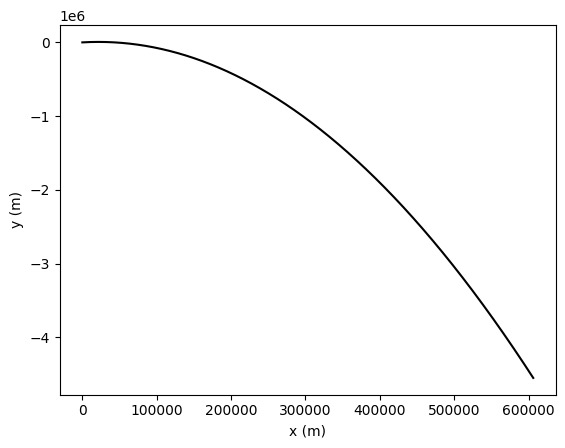

In [ ]:
sol1 = proyectil_prueba(0, theta, v0)
sol1_x = sol1[1]
sol1_y = sol1[2]
plt.plot(sol1_x, sol1_y, color = 'black')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
#plt.title('motion of projectile')
#plt.xlim(34000, 36000)
plt.show()

We observe from the graph that the projectile without air resistance tends to maintain its uniform rectilinear motion to the right. Just as expected, as studied in basic physics courses.

#### **2.2 Trajectory with resistance**
For the trajectory with resistance we use a value $k\neq 0$.

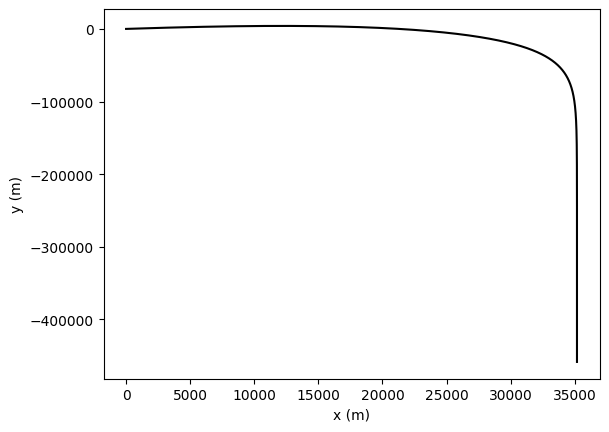

In [ ]:
sol1 = proyectil_prueba(k, theta, v0)
sol1_x = sol1[1]
sol1_y = sol1[2]
plt.plot(sol1_x, sol1_y, color = 'black')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
#plt.title('motion of projectile')
#plt.xlim(34000, 36000)
plt.show()

In the graph, we observe that, unlike the projectile without air resistance, the one with resistance reaches a point where the horizontal resistance counteracts the horizontal velocity, making it zero. The motion then becomes free fall after a certain horizontal distance.

#### **2.3 Graph of the trajectory of a projectile with and without resistance**

In the variable $\texttt{sol_con_resistencia}$ we save the values ​​of the $\texttt{return}$ of the function $\texttt{projectile()}$ for a projectile **with air resistance**.

In the variable $\texttt{sol_sin_resistencia}$ we save the values ​​of the $\texttt{return}$ of the function $\texttt{projectile()}$ for a projectile **without air resistance**.

Then a trajectory graph of both projectiles is made in the plane $xy$.

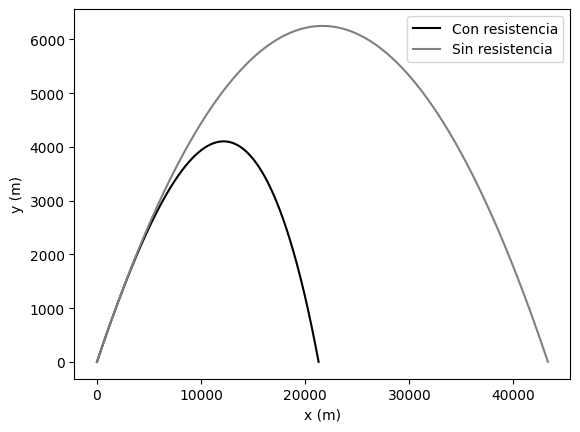

In [ ]:
sol_con_resistencia = proyectil(k, theta, v0)
sol_sin_resistencia = proyectil(0, theta, v0)

plt.plot(sol_con_resistencia[1], sol_con_resistencia[2], label='Con resistencia', color = 'black')
plt.plot(sol_sin_resistencia[1], sol_sin_resistencia[2], label='Sin resistencia', color = 'gray')
plt.legend()
plt.xlabel('x (m)')
plt.ylabel('y (m)')
#plt.title('projectile motion')

plt.show()

In this result, the difference between the trajectory of a projectile that presents air resistance and one that does not is noticeable. As expected, the projectile that does not present air resistance achieves a greater horizontal range.

###**3. Maximum horizontal range without air resistance**

In this section, we create a list of angles $\texttt{list_ang}$ in which we store angles from 0 to 90 degrees in increments of 3. Then, using a $\texttt{for}$ loop, we create solutions for each of these angles, without resistance, to only store their maximum horizontal ranges in a new list $\texttt{list_max}$.

In the variable $\texttt{max}$ we obtain the value of the maximum range of all of them and in $\texttt{max_ang}$ we obtain their corresponding launch angle.

Finally, we graph these results.

Text(10, 10, 'θ= 45.00°')

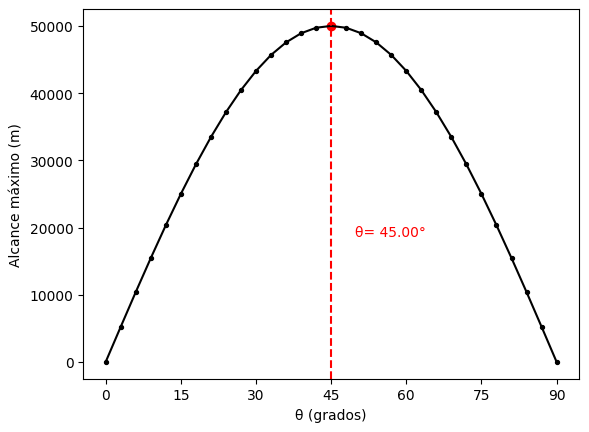

In [ ]:
list_max = []
list_ang = np.arange(0, 93, 3)
#We tested angles from 0 to 90 degrees in 3s.
for i in list_ang:
  sol = proyectil(0, np.radians(i), v0)
  sol_x = sol[1]
  sol_y = sol[2]
  list_max.append(sol_x[-1]) #ready to store maximum ranges

max = np.max(list_max) #get maximum range of all
max_ang = list_max.index(max)*3 #get the corresponding angle

plt.plot(list_ang, list_max, color = 'black')
plt.scatter(list_ang, list_max, color='black', s=8)
plt.scatter(max_ang, max, color='red')
plt.xlabel('θ (grados)')
plt.ylabel('Alcance máximo (m)')
plt.xticks(np.arange(0, 90 + 1, 15))
plt.axvline(x=max_ang, color='red', linestyle='--', linewidth=1.5)
plt.annotate(f'θ= {max_ang:.2f}°',
             xy=(max_ang +2, max/3),
             xytext=(10, 10),
             textcoords='offset points',
             fontsize=10, color = 'red')

#plt.title('Maximum range vs launch angle, projectile without drag')

#print("The maximum range is ", max, " m and is given at an angle of ", max_ang, " degrees")

As expected, a projectile that does not present air resistance has its maximum horizontal range at $45^{\circ}$. Just as studied in basic physics courses, but this time we have obtained this result numerically.

###**4. Maximum horizontal range with air resistance**
Similarly to the previous section, we now create a list of angles, but this time with a larger number of elements. The angles range from 0 to 90 degrees, increasing by 0.1. This way, our result will be more precise to determine the angle for the maximum horizontal range of a projectile with air resistance. We also store the maximum horizontal ranges in a list.

In [ ]:
list_max_resist = []
list_ang_resist = np.arange(0, 90.1, 0.1)
#We tested with angles from 0 to 90 degrees in increments of 0.1
for i in list_ang_resist:
  sol = proyectil(k, np.radians(i), v0)
  sol_x = sol[1]
  sol_y = sol[2]
  list_max_resist.append(sol_x[-1]) #ready to store maximum ranges



When plotting the graph, to avoid having to plot so many points, we create two new lists of angles and ranges based on the previous result, but in these new lists, we take values every 15 elements. That is, we plot a smaller set of points.

Text(10, 10, 'θ= 38.90°')

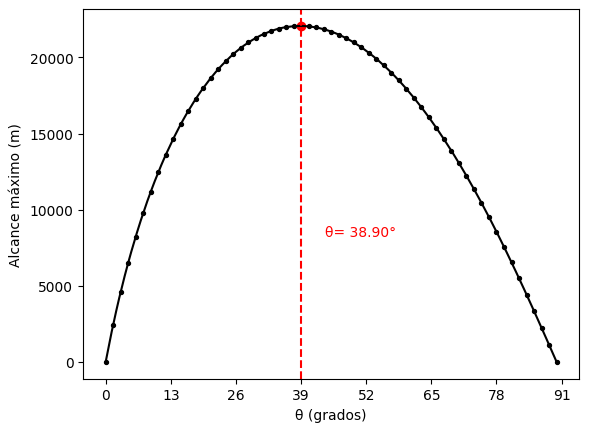

In [ ]:
#we create two lists that are a subset of the range and angle list
#to plot few points
list_max_2 = list_max_resist[::15]
list_ang_2 = list_ang_resist[::15]
#-------

max_resist = np.max(list_max_resist) #get maximum range of all
max_ang_resist = list_max_resist.index(max_resist)*0.1 #get the corresponding angle
plt.plot(list_ang_resist, list_max_resist, color = 'black')
plt.scatter(list_ang_2, list_max_2, color='black', s=8)
plt.scatter(max_ang_resist, max_resist, color='red')
plt.xlabel('θ (grados)')
plt.ylabel('Alcance máximo (m)')
plt.xticks(np.arange(0, 90 + 2, 13))
plt.axvline(x=max_ang_resist, color='red', linestyle='--', linewidth=1.5)
plt.annotate(f'θ= {max_ang_resist:.2f}°',
             xy=(max_ang_resist +2, max_resist/3),
             xytext=(10, 10),
             textcoords='offset points',
             fontsize=10, color = 'red')
#plt.title('Maximum range and launch angle, projectile with resistance')

#print("The maximum range is ", max, " m and is given at an angle of ", max_ang, " degrees")

De esta gráfica vemos que el alcance máximo horizontal se encuentra a un ángulo de $38.9^{\circ}$.
